# Filip Kucia

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Exercices 1-8



1. LaTeX


In [20]:
import numpy as np
from scipy.optimize import minimize

# Define the space of graphs with N=2 vertices
# There are 2^(N(N-1)/2) = 2 possible graphs (no edges, one edge)
N = 3
num_graphs = 2 ** (N * (N - 1) // 2)

# Initial probability distribution (uniform)
initial_probs = np.full(num_graphs, 1 / num_graphs)

# Entropy function
def entropy(P):
    return -np.sum(P * np.log(P + 1e-10))  # Add small term to avoid log(0)

# Constraint: Sum of probabilities should be 1
constraints = {
    'type': 'eq',
    'fun': lambda P: np.sum(P) - 1
}

# Bounds for each P(G) to be in [0, 1]
bounds = [(0, 1) for _ in range(num_graphs)]

# Maximize entropy (minimize negative entropy)
result = minimize(lambda P: -entropy(P), initial_probs, constraints=[constraints], bounds=bounds)

# Display the result
if result.success:
    optimal_probs = result.x
    print("Optimal Probability Distribution P(G):")
    print(optimal_probs)
else:
    print("Optimization did not succeed.")


Optimal Probability Distribution P(G):
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]


### Ex.2


Implement a function that returns the adjacency matrix of one
realization of the ER graph with given values of N and p. Watch out
for the trap!

In [7]:
def adj_matrix(p: float, N = 10):
    G = nx.generators.erdos_renyi_graph(N, p)
    A = np.zeros((N,N))

    for u in G.edges(data = True):
#         print(u[0], u[1])

        A[u[0], u[1]] = 1
        A[u[1], u[0]] = 1
    return A,G

In [14]:
p = 0.4
N = 10
A,G = adj_matrix(p = p, N = N)

In [15]:
A

array([[0., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 0.]])

### Ex.3

Draw resulting graph

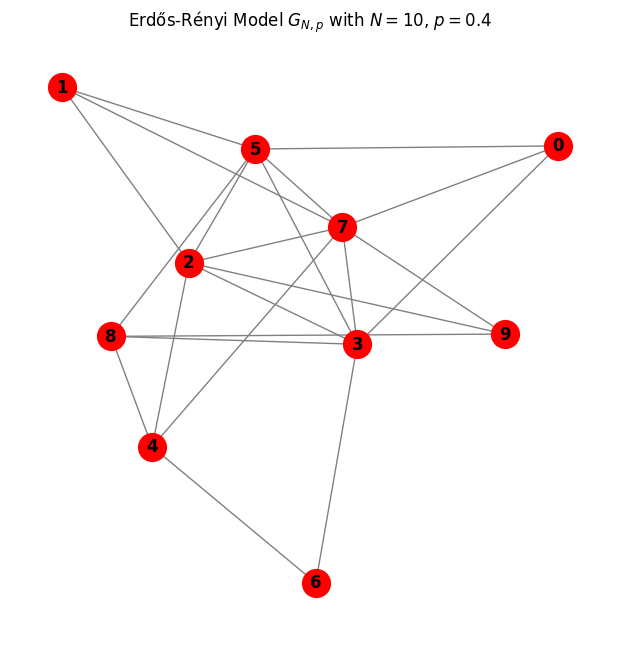

In [16]:
# draw with networkx
G = nx.from_numpy_array(A)
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="red", node_size=400, 
        edge_color="gray", font_size=12, font_weight="bold")
plt.title(f"Erdős-Rényi Model $G_{{N, p}}$ with $N={N}$, $p={p}$")
plt.show()


### Ex.4

Draw histogram of degree distribution.

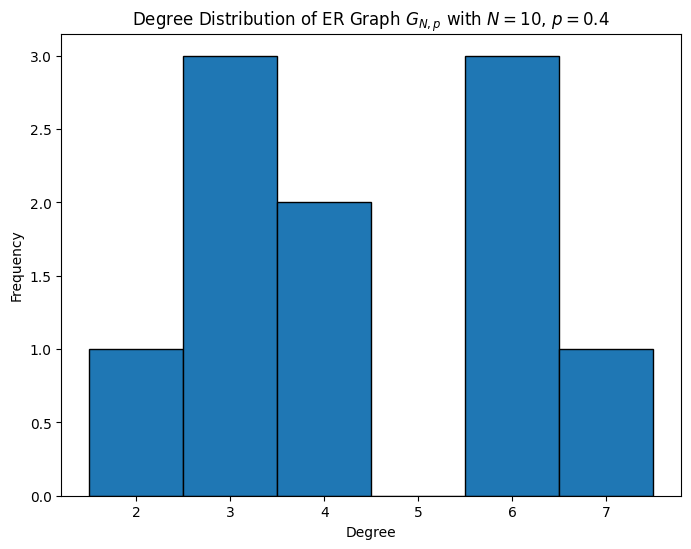

In [18]:
degrees = [degree for _, degree in G.degree()]

plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title(f"Degree Distribution of ER Graph $G_{{N, p}}$ with $N={N}$, $p={p}$")
plt.xticks(range(min(degrees), max(degrees) + 1))
plt.show()

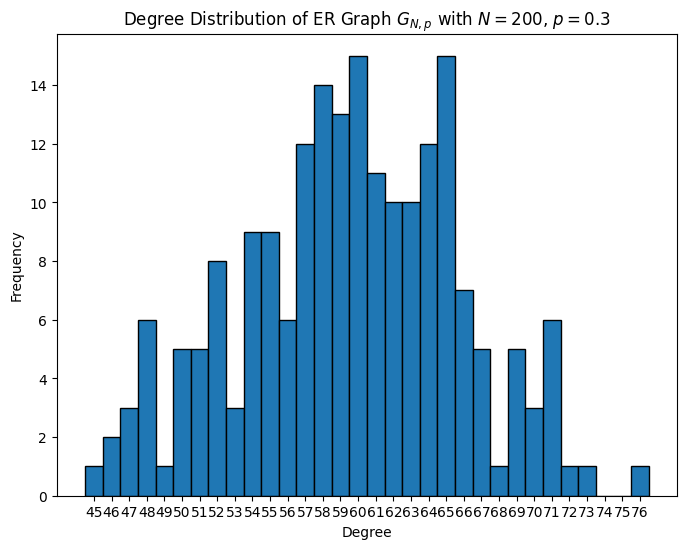

In [21]:
N = 200
p = 0.3
A,G = adj_matrix(p = p, N = N)


degrees = [degree for _, degree in G.degree()]

plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title(f"Degree Distribution of ER Graph $G_{{N, p}}$ with $N={N}$, $p={p}$")
plt.xticks(range(min(degrees), max(degrees) + 1))
plt.show()

### Ex.5

What degree of vertex distribution do we expect?

Answer:  We expect **binomial** distribution, which for huge N and small p could be approximated by poissonian distribution. 



Then, ⟨ k⟩ ≈ Np  is a good poisson distribution parameter.

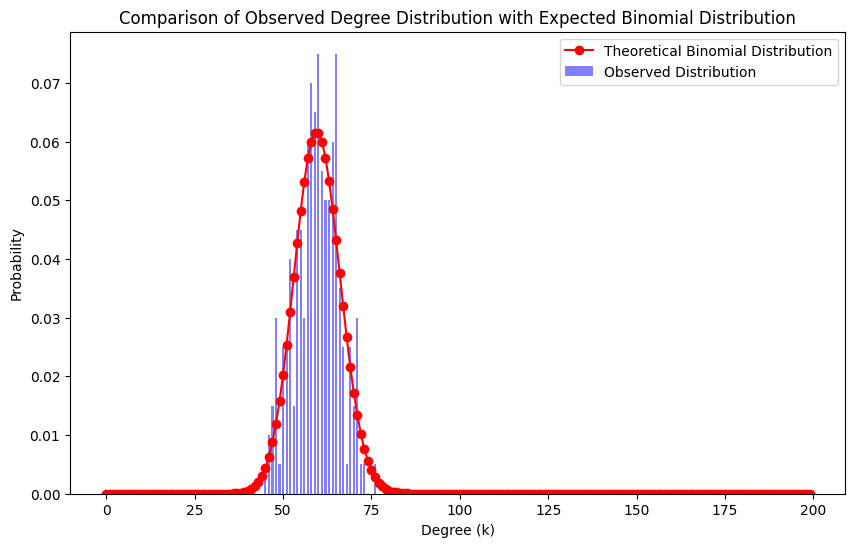

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

observed_counts, bins = np.histogram(degrees, bins=range(max(degrees) + 2), density=True)

# Theoretical Binomial Distribution
k_values = np.arange(0, N)  # Possible degrees from 0 to N-1
theoretical_probs = binom.pmf(k_values, N - 1, p)

# Plot Observed and Theoretical Degree Distributions
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], observed_counts, width=0.6, alpha=0.5, color='blue', label="Observed Distribution")
plt.plot(k_values, theoretical_probs, 'ro-', label="Theoretical Binomial Distribution")
plt.xlabel("Degree (k)")
plt.ylabel("Probability")
plt.title("Comparison of Observed Degree Distribution with Expected Binomial Distribution")
plt.legend()
plt.show()

### Ex.6

Give the mathematical justification for the Poisson approximation
used.

It could be proven that while N tends to infinity, and lambda (or \<k>) = N*p, then the probability distribution tends to poisson probability distribution. 


Proof for example here: http://mathcenter.oxford.emory.edu/site/math117/connectingPoissonAndBinomial/ 

### Ex.7

Plot both the simulation results and analytically obtained
distributions on one graph. Test appropriate hypotheses.

(array([ 23., 114., 293., 312., 542., 390., 163., 110.,  45.,   8.]),
 array([ 8. , 10.7, 13.4, 16.1, 18.8, 21.5, 24.2, 26.9, 29.6, 32.3, 35. ]),
 <BarContainer object of 10 artists>)

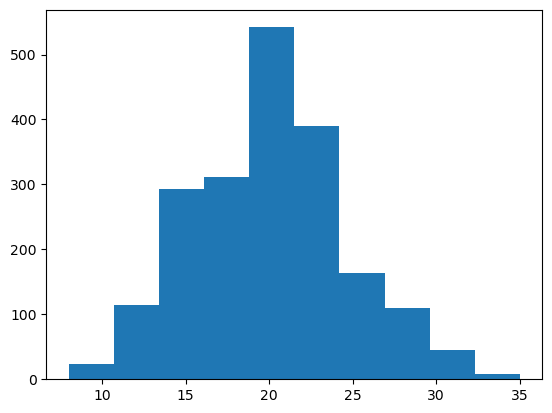

In [20]:
A,G = adj_matrix(p = 0.01, N = 2000)


X = list(dict(G.degree).values())
plt.hist(X)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, binom
import networkx as nx
import ipywidgets as widgets
from ipywidgets import interact
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Function to create an adjacency matrix and graph for degree distribution
def adj_matrix(p, N):
    G = nx.erdos_renyi_graph(N, p)
    A = nx.adjacency_matrix(G)
    return A, G

# Generate Poisson and Binomial samples
def generate_samples(N, p):
    if p <= 0 or p > 1:
        raise ValueError("Probability p must be in the range (0, 1].")
    if N <= 1:
        raise ValueError("N must be greater than 1.")

    lambda_ = p * (N - 1)  # Expected degree for Poisson approximation
    poisson_sample = poisson.rvs(mu=lambda_, size=N, random_state=13)
    
    # Ensure n is valid for binomial distribution
    n_trials = N - 1
    if n_trials < 1:
        n_trials = 1  # Minimum of 1 trial
    
    binomial_sample = binom.rvs(n=n_trials, p=p, size=N, random_state=13)
    return poisson_sample, binomial_sample

# Interactive plot function
def plot_distributions(N, p, poisson_plot=True, binomial_plot=True, simulation_plot=True):
    # Generate samples and ER graph
    poisson_sample, binomial_sample = generate_samples(N, p)
    A, G = adj_matrix(p, N)
    simulation_degrees = list(dict(G.degree).values())
    
    # Prepare plot
    plt.figure(figsize=(12, 6))
    
    if poisson_plot:
        sns.histplot(poisson_sample, kde=False, label='Poisson', bins=np.linspace(0, max(simulation_degrees), num=36), color='blue', alpha=0.6)
    if binomial_plot:
        sns.histplot(binomial_sample, kde=False, label='Binomial', bins=np.linspace(0, max(simulation_degrees), num=36), color='green', alpha=0.6)
    if simulation_plot:
        sns.histplot(simulation_degrees, kde=False, label='Simulation', bins=np.linspace(0, max(simulation_degrees), num=36), color='red', alpha=0.6)

    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plots (N={N}, p={p:.2f})')
    plt.legend()
    plt.show()

# Create interactive widgets
interact(plot_distributions,
         N=widgets.IntSlider(value=1000, min=100, max=5000, step=100, description='N'),
         p=widgets.FloatSlider(value=0.03, min=0.01, max=1, step=0.01, description='p'),
         poisson_plot=widgets.Checkbox(value=True, description='Poisson'),
         binomial_plot=widgets.Checkbox(value=True, description='Binomial'),
         simulation_plot=widgets.Checkbox(value=True, description='Simulation'));


interactive(children=(IntSlider(value=1000, description='N', max=5000, min=100, step=100), FloatSlider(value=0…

In [9]:
from scipy.stats import ks_2samp

In [23]:
# hypotheeses tests

In [7]:
from scipy.stats import poisson
from scipy.stats import binom
import matplotlib.pyplot as plt 
import seaborn as sns
A,G = adj_matrix(p = 0.01, N = 2000)


X = list(dict(G.degree).values())


# Create the sample
sample = poisson.rvs(mu=20, size=2000, random_state=13)
sample2 = binom.rvs(p=0.01, n=2000, size = 2000, random_state=13)


In [10]:
ks_2samp(X, sample, alternative='two-sided', method='auto')

# null hypothesis should not be rejected, degree distribution sample and poisson distribution sample have similar distributions 

KstestResult(statistic=0.032, pvalue=0.2574754523872385, statistic_location=24, statistic_sign=1)

In [11]:
ks_2samp(X, sample2, alternative='two-sided', method='auto')

# null hypothesis should not be rejected, degree distribution sample and binomial distribution sample have similar distributions 

KstestResult(statistic=0.0125, pvalue=0.9976509261145676, statistic_location=21, statistic_sign=1)

In [12]:
res = ks_2samp(X, sample2, alternative='two-sided', method='auto')

In [13]:
res[1]

0.9976509261145676

### Ex.8

Check dependence of the results of the previous excercise for
various values of p and N.

# Fixed

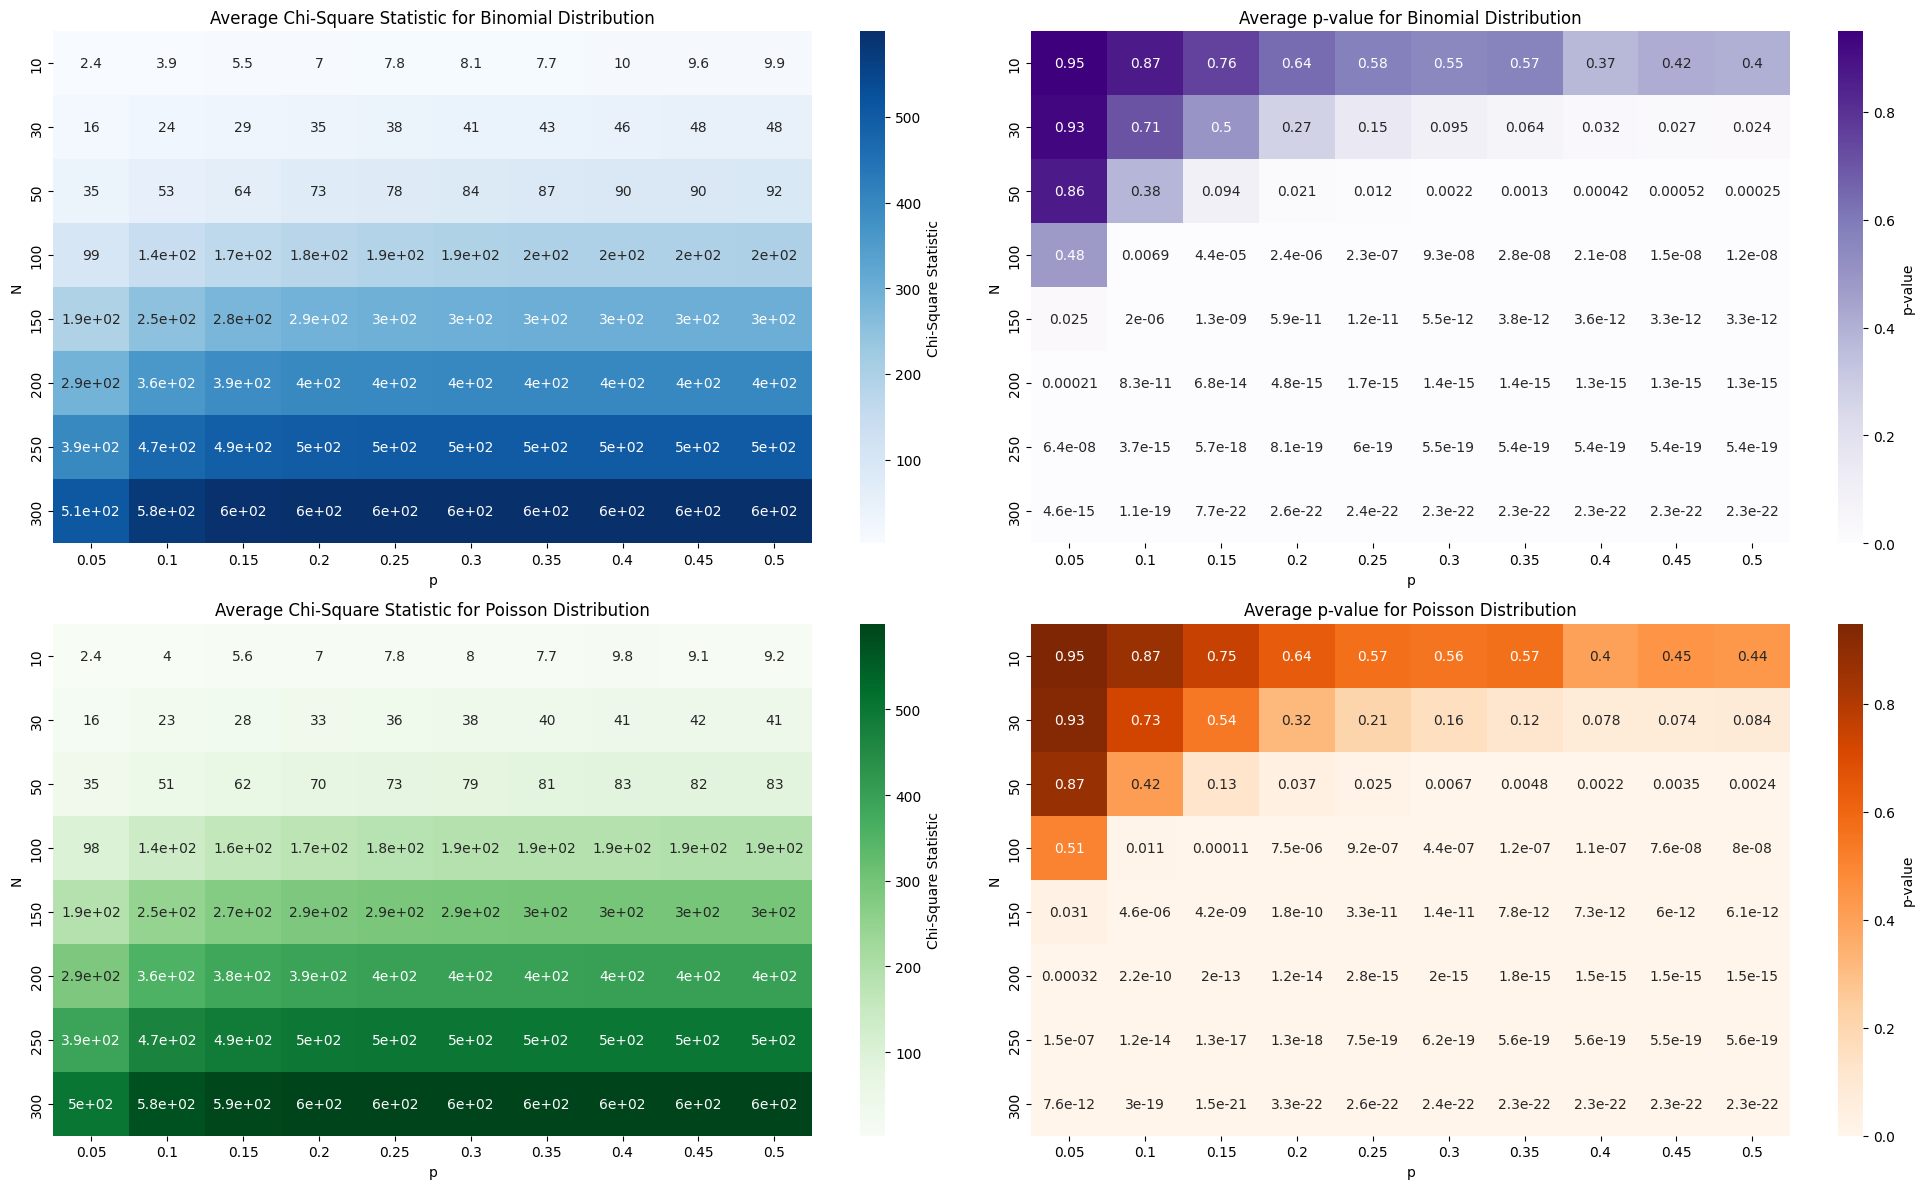

In [40]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, binom, poisson
import pandas as pd
import seaborn as sns

def erdos_renyi_graph(N, p):
    """Generate an Erdos-Renyi graph as an adjacency matrix."""
    return np.random.rand(N, N) < p

def chi_square_test_for_combinations(n_values, p_values, num_simulations=100):
    results = []

    for N in n_values:
        for p in p_values:
            chi2_stats_binom = []
            chi2_pvals_binom = []
            chi2_stats_poisson = []
            chi2_pvals_poisson = []

            for _ in range(num_simulations):
                # Generate the ER graph
                adj_matrix = erdos_renyi_graph(N, p).astype(int)
                np.fill_diagonal(adj_matrix, 0)
                G = nx.from_numpy_array(adj_matrix)
                degrees = np.array([degree for node, degree in G.degree()])

                # Expected degree distribution under binomial hypothesis
                k_values = np.arange(0, N)
                binomial_probs = binom.pmf(k_values, N - 1, p)
                poisson_probs = poisson.pmf(k_values, p * (N - 1))

                # Observed degree counts
                observed_counts, _ = np.histogram(degrees, bins=np.arange(0, N + 1))

                # Expected counts under binomial and Poisson
                expected_binomial_counts = len(degrees) * binomial_probs
                expected_poisson_counts = len(degrees) * poisson_probs

                # Filter out categories where expected counts are zero or too small
                valid_indices_binom = expected_binomial_counts > 0
                valid_indices_poisson = expected_poisson_counts > 0

                observed_counts_filtered_binom = observed_counts[valid_indices_binom]
                expected_binomial_counts = expected_binomial_counts[valid_indices_binom]

                observed_counts_filtered_poisson = observed_counts[valid_indices_poisson]
                expected_poisson_counts = expected_poisson_counts[valid_indices_poisson]

                # Chi-Square test for binomial distribution
                if len(observed_counts_filtered_binom) > 1 and np.all(expected_binomial_counts > 0):
                    chi2_binom, pval_binom, _, _ = chi2_contingency(
                        [observed_counts_filtered_binom, expected_binomial_counts], correction=False
                    )
                    chi2_stats_binom.append(chi2_binom)
                    chi2_pvals_binom.append(pval_binom)

                # Chi-Square test for Poisson distribution
                if len(observed_counts_filtered_poisson) > 1 and np.all(expected_poisson_counts > 0):
                    chi2_poisson, pval_poisson, _, _ = chi2_contingency(
                        [observed_counts_filtered_poisson, expected_poisson_counts], correction=False
                    )
                    chi2_stats_poisson.append(chi2_poisson)
                    chi2_pvals_poisson.append(pval_poisson)

            avg_chi2_binom = np.mean(chi2_stats_binom) if chi2_stats_binom else np.nan
            avg_pval_binom = np.mean(chi2_pvals_binom) if chi2_pvals_binom else np.nan
            avg_chi2_poisson = np.mean(chi2_stats_poisson) if chi2_stats_poisson else np.nan
            avg_pval_poisson = np.mean(chi2_pvals_poisson) if chi2_pvals_poisson else np.nan

            results.append({
                'N': N,
                'p': p,
                'Chi2_Binom': avg_chi2_binom,
                'Pval_Binom': avg_pval_binom,
                'Chi2_Poisson': avg_chi2_poisson,
                'Pval_Poisson': avg_pval_poisson
            })

    return pd.DataFrame(results)

# Define a wider range for N and p values
n_values = [10, 30, 50, 100, 150, 200, 250, 300]
p_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# Run the test for the combinations
results_df = chi_square_test_for_combinations(n_values, p_values, num_simulations=50)

# Visualize the results using heatmaps for Chi-Square statistics and p-values
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
binom_chi2_pivot = results_df.pivot(index='N', columns='p', values='Chi2_Binom')
sns.heatmap(binom_chi2_pivot, annot=True, cmap='Blues', cbar_kws={'label': 'Chi-Square Statistic'})
plt.title('Average Chi-Square Statistic for Binomial Distribution')
plt.xlabel('p')
plt.ylabel('N')

plt.subplot(2, 2, 2)
binom_pval_pivot = results_df.pivot(index='N', columns='p', values='Pval_Binom')
sns.heatmap(binom_pval_pivot, annot=True, cmap='Purples', cbar_kws={'label': 'p-value'})
plt.title('Average p-value for Binomial Distribution')
plt.xlabel('p')
plt.ylabel('N')

plt.subplot(2, 2, 3)
poisson_chi2_pivot = results_df.pivot(index='N', columns='p', values='Chi2_Poisson')
sns.heatmap(poisson_chi2_pivot, annot=True, cmap='Greens', cbar_kws={'label': 'Chi-Square Statistic'})
plt.title('Average Chi-Square Statistic for Poisson Distribution')
plt.xlabel('p')
plt.ylabel('N')

plt.subplot(2, 2, 4)
poisson_pval_pivot = results_df.pivot(index='N', columns='p', values='Pval_Poisson')
sns.heatmap(poisson_pval_pivot, annot=True, cmap='Oranges', cbar_kws={'label': 'p-value'})
plt.title('Average p-value for Poisson Distribution')
plt.xlabel('p')
plt.ylabel('N')

plt.tight_layout()
plt.show()


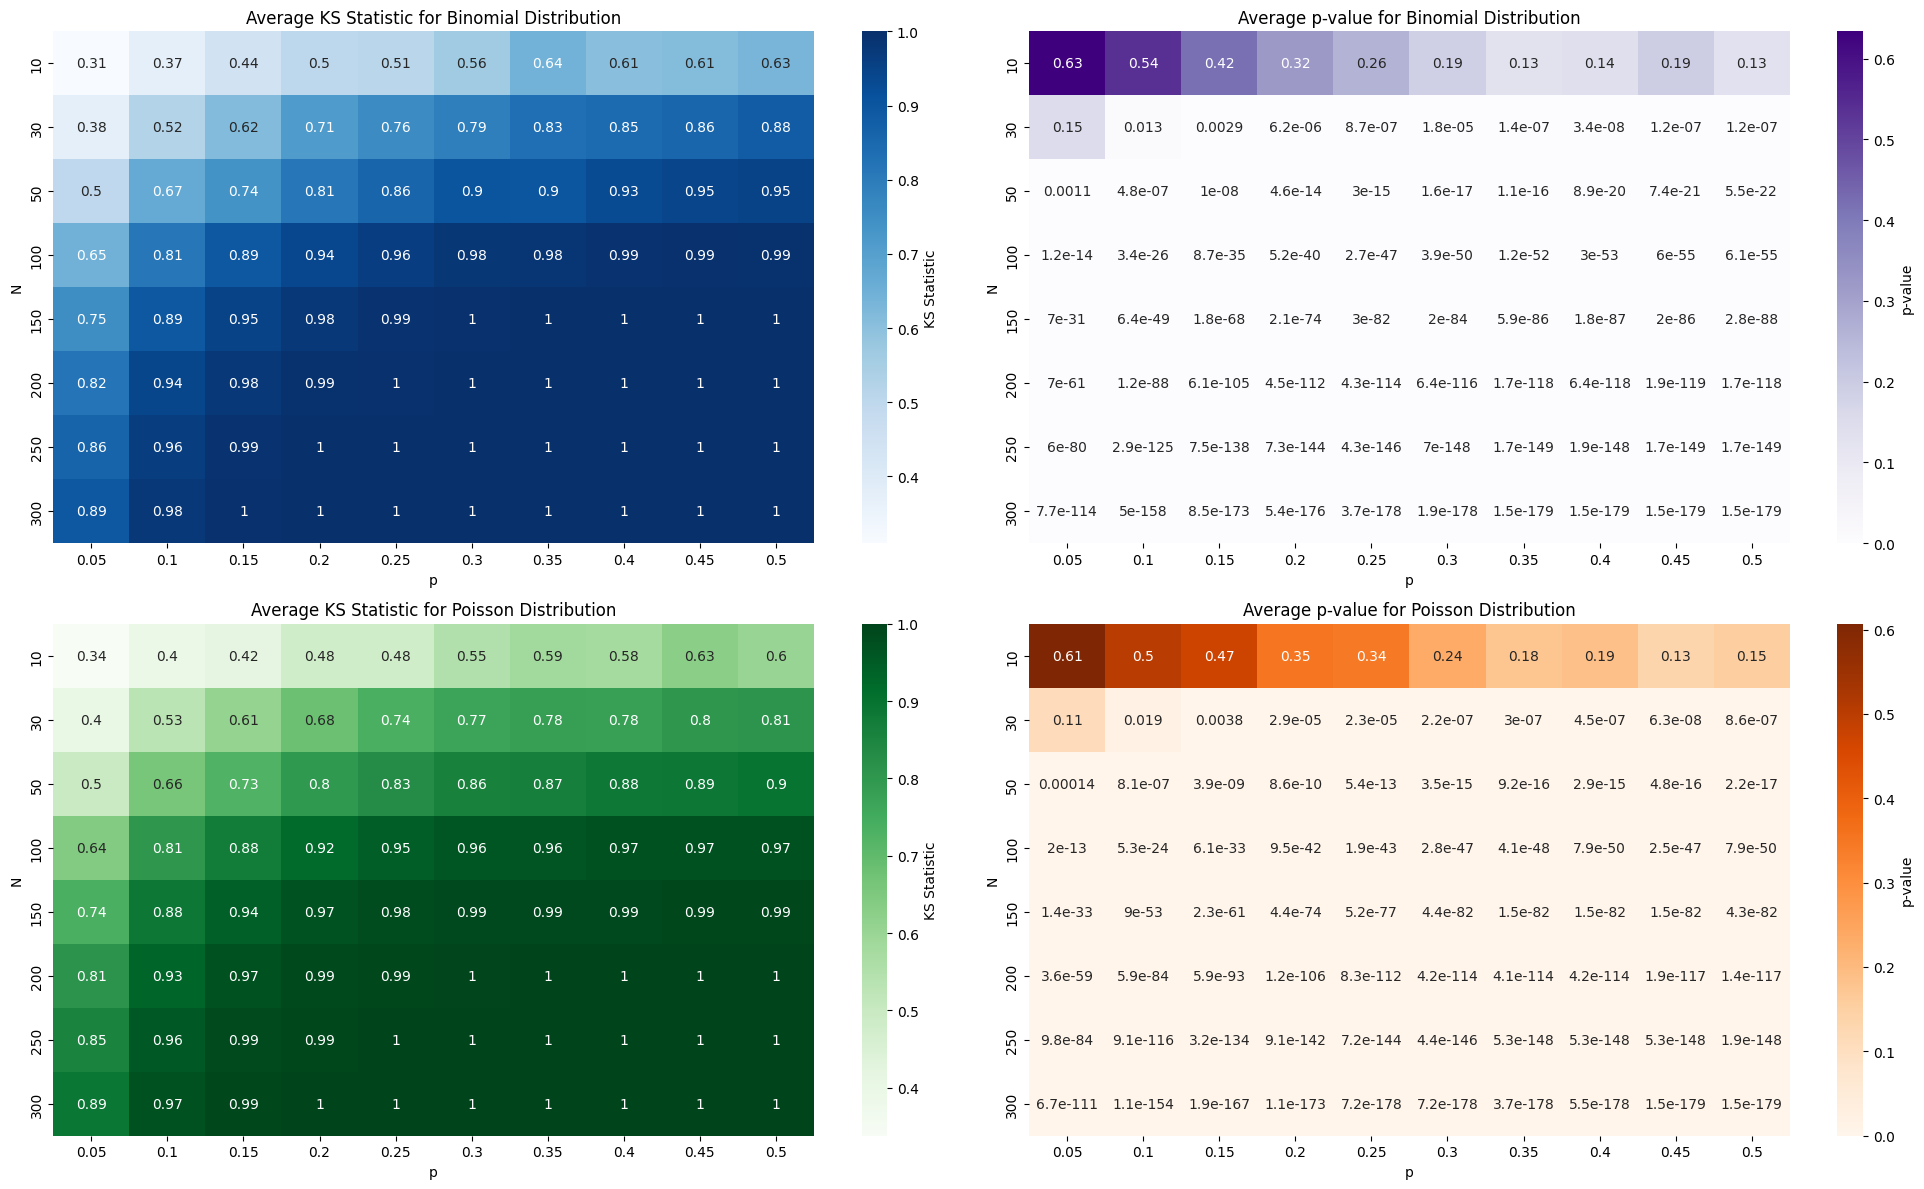

In [34]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, binom, poisson
import pandas as pd
import seaborn as sns

def erdos_renyi_graph(N, p):
    """Generate an Erdos-Renyi graph as an adjacency matrix."""
    return np.random.rand(N, N) < p

def ks_test_for_combinations(n_values, p_values, num_simulations=100):
    results = []

    for N in n_values:
        for p in p_values:
            ks_stats_binom = []
            ks_pvals_binom = []
            ks_stats_poisson = []
            ks_pvals_poisson = []

            for _ in range(num_simulations):
                # Generate the ER graph
                adj_matrix = erdos_renyi_graph(N, p).astype(int)
                np.fill_diagonal(adj_matrix, 0)
                G = nx.from_numpy_array(adj_matrix)
                degrees = [degree for node, degree in G.degree()]

                # Expected degree distribution under binomial hypothesis
                k_values = np.arange(0, N)
                binomial_probs = binom.pmf(k_values, N - 1, p)
                poisson_probs = poisson.pmf(k_values, p * (N - 1))

                # KS Test against binomial and Poisson
                observed_counts = np.array(degrees)
                expected_binomial_samples = np.random.choice(
                    k_values, size=len(degrees), p=binomial_probs/binomial_probs.sum()
                )
                expected_poisson_samples = np.random.choice(
                    k_values, size=len(degrees), p=poisson_probs/poisson_probs.sum()
                )

                ks_stat_binom, pval_binom = ks_2samp(observed_counts, expected_binomial_samples)
                ks_stat_poisson, pval_poisson = ks_2samp(observed_counts, expected_poisson_samples)

                ks_stats_binom.append(ks_stat_binom)
                ks_pvals_binom.append(pval_binom)
                ks_stats_poisson.append(ks_stat_poisson)
                ks_pvals_poisson.append(pval_poisson)

            avg_ks_binom = np.mean(ks_stats_binom)
            avg_pval_binom = np.mean(ks_pvals_binom)
            avg_ks_poisson = np.mean(ks_stats_poisson)
            avg_pval_poisson = np.mean(ks_pvals_poisson)

            results.append({
                'N': N,
                'p': p,
                'KS_Binom': avg_ks_binom,
                'Pval_Binom': avg_pval_binom,
                'KS_Poisson': avg_ks_poisson,
                'Pval_Poisson': avg_pval_poisson
            })

    return pd.DataFrame(results)

# Define a wider range for N and p values
n_values = [10, 30, 50, 100, 150, 200, 250, 300]
p_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# Run the test for the combinations
results_df = ks_test_for_combinations(n_values, p_values, num_simulations=50)

# Visualize the results using heatmaps for KS statistics and p-values
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
binom_ks_pivot = results_df.pivot(index='N', columns='p', values='KS_Binom')
sns.heatmap(binom_ks_pivot, annot=True, cmap='Blues', cbar_kws={'label': 'KS Statistic'})
plt.title('Average KS Statistic for Binomial Distribution')
plt.xlabel('p')
plt.ylabel('N')

plt.subplot(2, 2, 2)
binom_pval_pivot = results_df.pivot(index='N', columns='p', values='Pval_Binom')
sns.heatmap(binom_pval_pivot, annot=True, cmap='Purples', cbar_kws={'label': 'p-value'})
plt.title('Average p-value for Binomial Distribution')
plt.xlabel('p')
plt.ylabel('N')

plt.subplot(2, 2, 3)
poisson_ks_pivot = results_df.pivot(index='N', columns='p', values='KS_Poisson')
sns.heatmap(poisson_ks_pivot, annot=True, cmap='Greens', cbar_kws={'label': 'KS Statistic'})
plt.title('Average KS Statistic for Poisson Distribution')
plt.xlabel('p')
plt.ylabel('N')

plt.subplot(2, 2, 4)
poisson_pval_pivot = results_df.pivot(index='N', columns='p', values='Pval_Poisson')
sns.heatmap(poisson_pval_pivot, annot=True, cmap='Oranges', cbar_kws={'label': 'p-value'})
plt.title('Average p-value for Poisson Distribution')
plt.xlabel('p')
plt.ylabel('N')

plt.tight_layout()
plt.show()


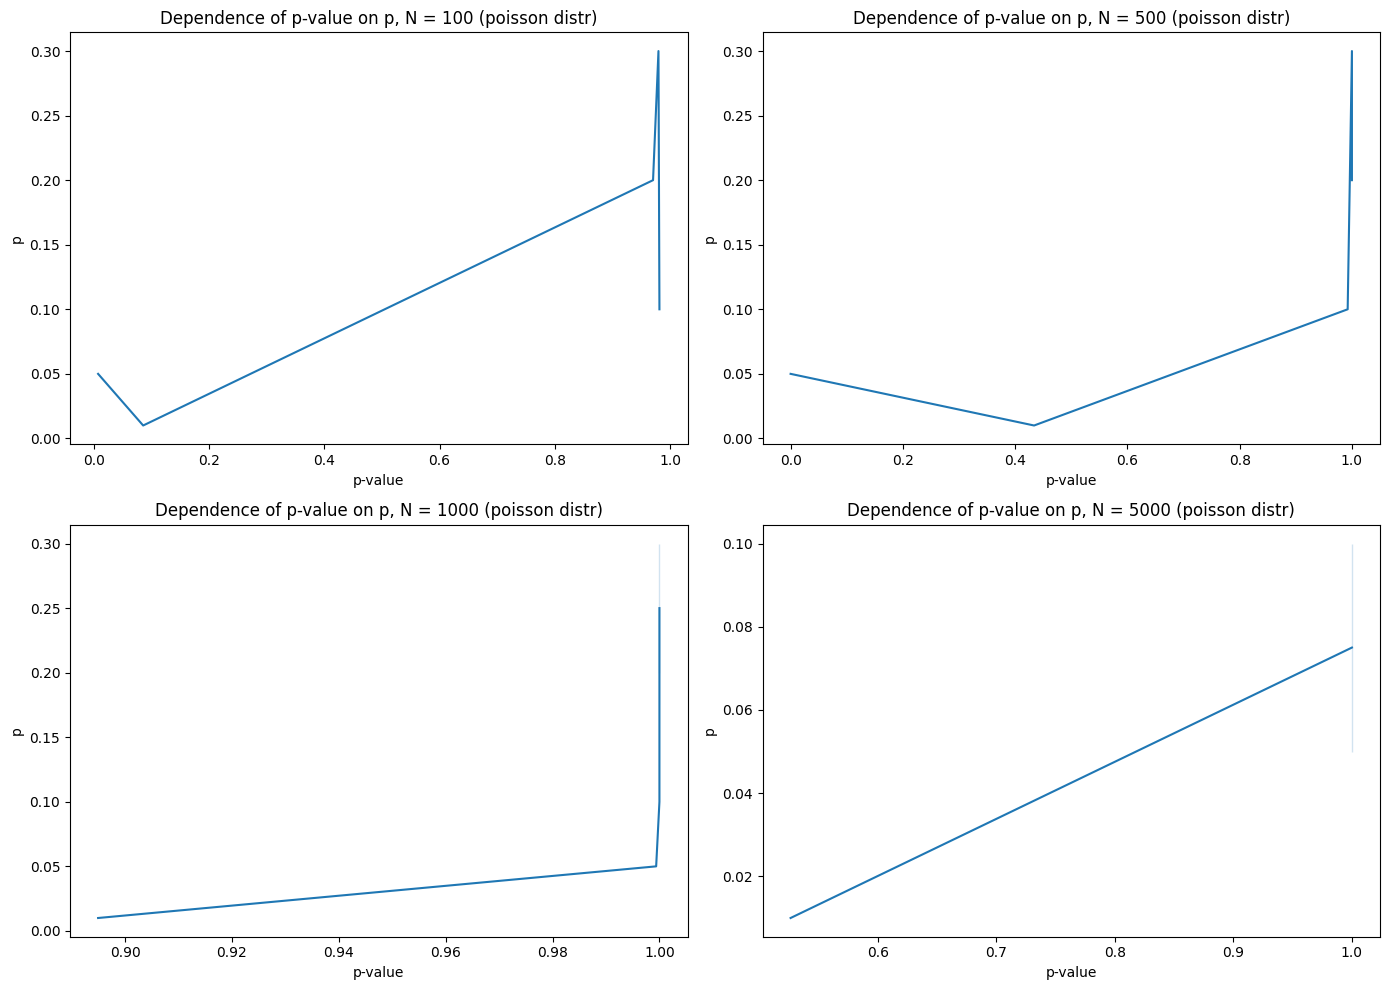

In [ ]:
### TODO uśrednić wyniki dla różnych N
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import poisson, chi2
import seaborn as sns
import pandas as pd

# Function to generate ER graph
def erdos_renyi_graph(N, p):
    adjacency_matrix = np.zeros((N, N), dtype=int)
    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1
    return adjacency_matrix

# Function to perform chi-square test and capture Poisson p-values for plotting
def capture_poisson_p_values_for_different_p(params, fixed_N):
    results = {'p': [], 'p_value_poisson': []}
    
    for p in params['p']:
        lambda_ = p * (fixed_N - 1)  # Expected degree for Poisson approximation
        adj_matrix = erdos_renyi_graph(fixed_N, p)
        G = nx.from_numpy_array(adj_matrix)
        degrees = [degree for node, degree in G.degree()]
        
        # Observed frequency of degrees
        observed_counts, bins = np.histogram(degrees, bins=range(max(degrees) + 2), density=True)
        k_values = np.arange(len(observed_counts))
        
        # Expected frequencies for Poisson distribution
        poisson_probs = poisson.pmf(k_values, lambda_)
        expected_poisson_counts = poisson_probs * fixed_N
        
        # Chi-square test for Poisson distribution
        chi2_poisson = np.sum((observed_counts * fixed_N - expected_poisson_counts)**2 / expected_poisson_counts)
        df = len(observed_counts) - 1
        p_value_poisson = 1 - chi2.cdf(chi2_poisson, df)
        
        # Store results
        results['p'].append(p)
        results['p_value_poisson'].append(p_value_poisson)
    
    return pd.DataFrame(results)

# Parameters to test
params = {
    'N': [100, 500, 1000, 5000],  # Different values of N
    'p': [0.01, 0.05, 0.1, 0.2, 0.3]   # Different values of p
}

# Create subplots for each N value
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, N in enumerate(params['N']):
    p_values_poisson_df = capture_poisson_p_values_for_different_p(params, N)
    
    sns.lineplot(ax=axes[i], data=p_values_poisson_df, x='p_value_poisson', y='p').set(
        title=f'Dependence of p-value on p, N = {N} (poisson distr)',
        xlabel='p-value',
        ylabel='p'
    )

plt.tight_layout()
plt.show()


Plotting for N=500 and p=0.01


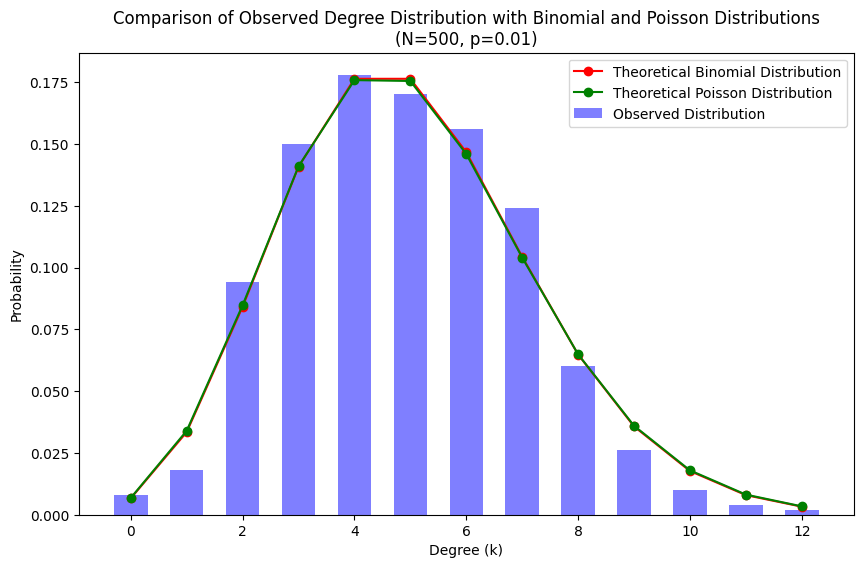

Plotting for N=500 and p=0.05


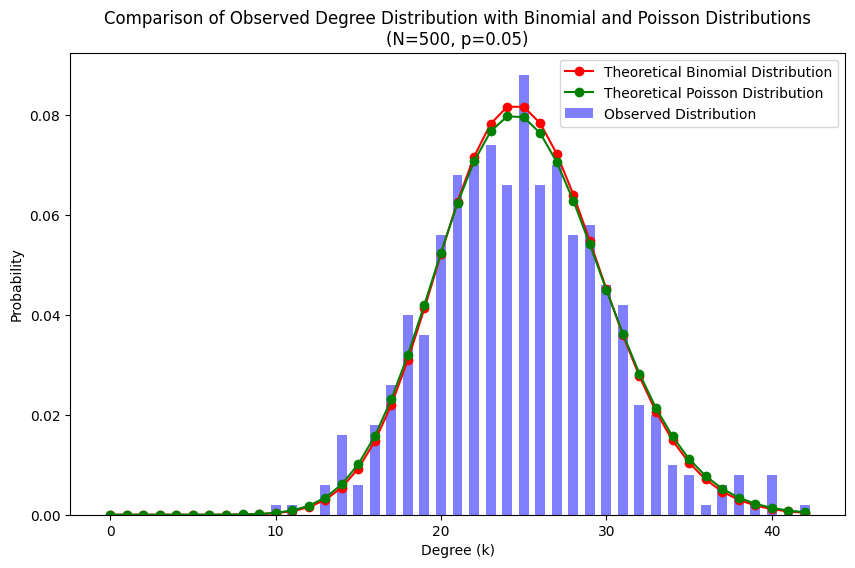

Plotting for N=500 and p=0.1


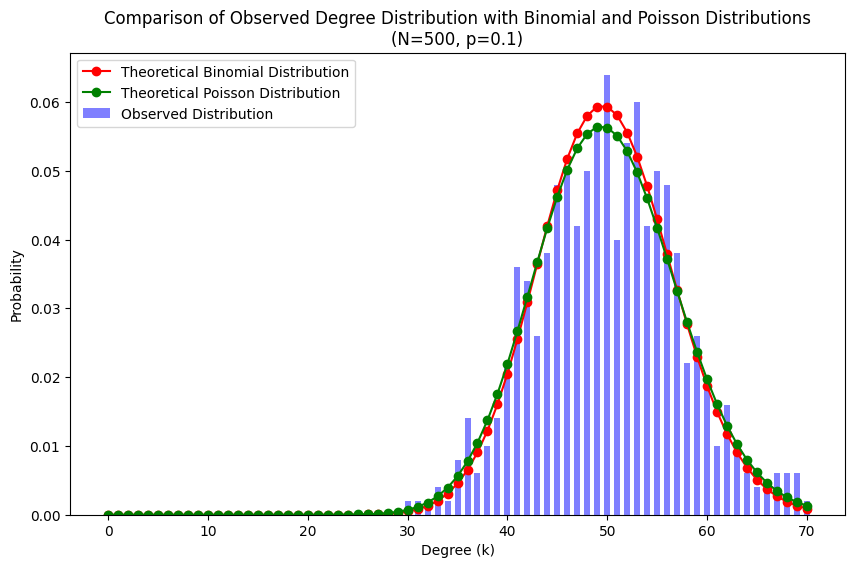

Plotting for N=1000 and p=0.01


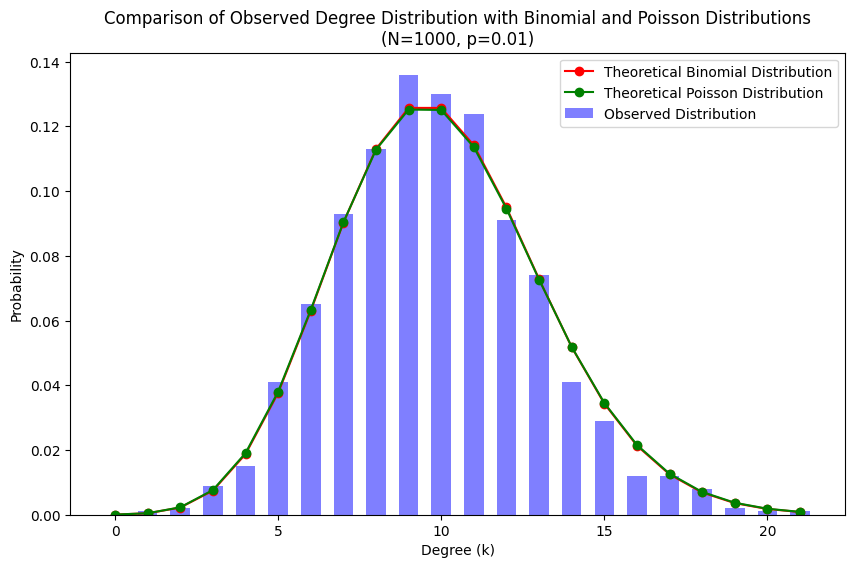

Plotting for N=1000 and p=0.05


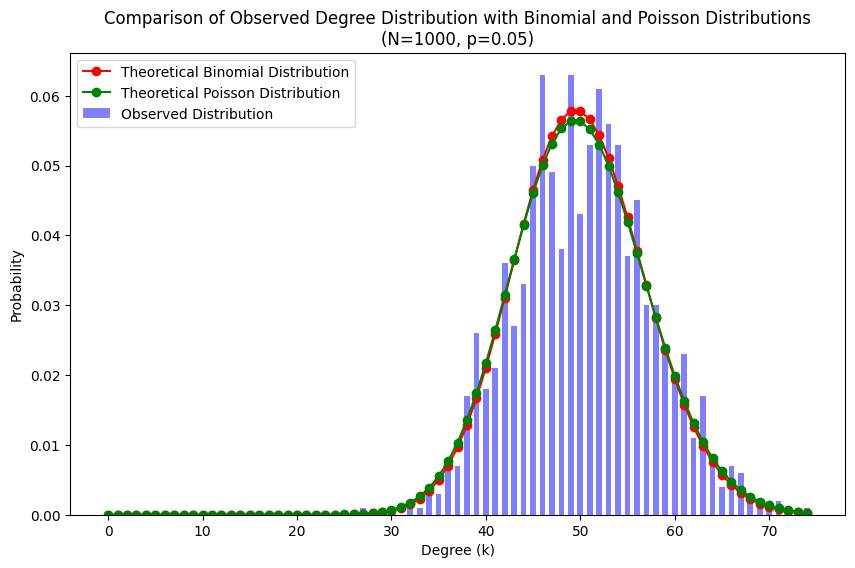

Plotting for N=1000 and p=0.1


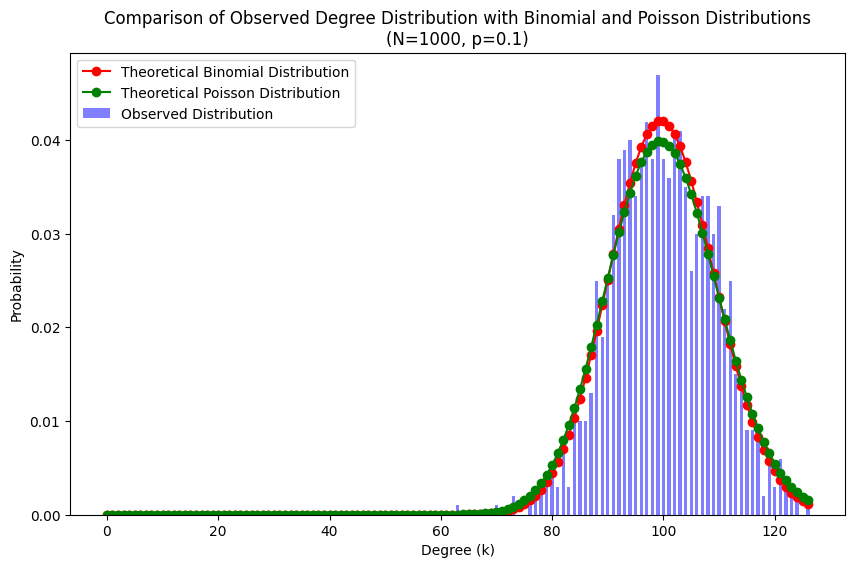

Plotting for N=2000 and p=0.01


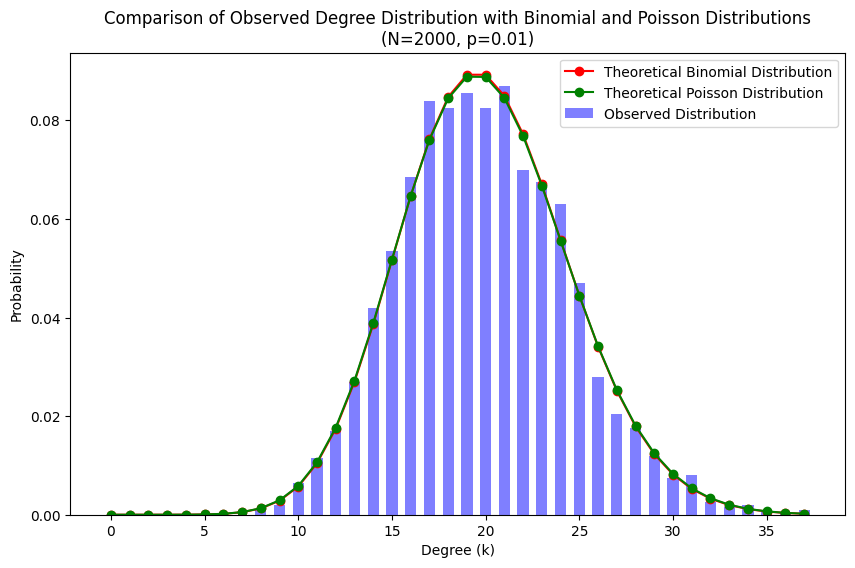

Plotting for N=2000 and p=0.05


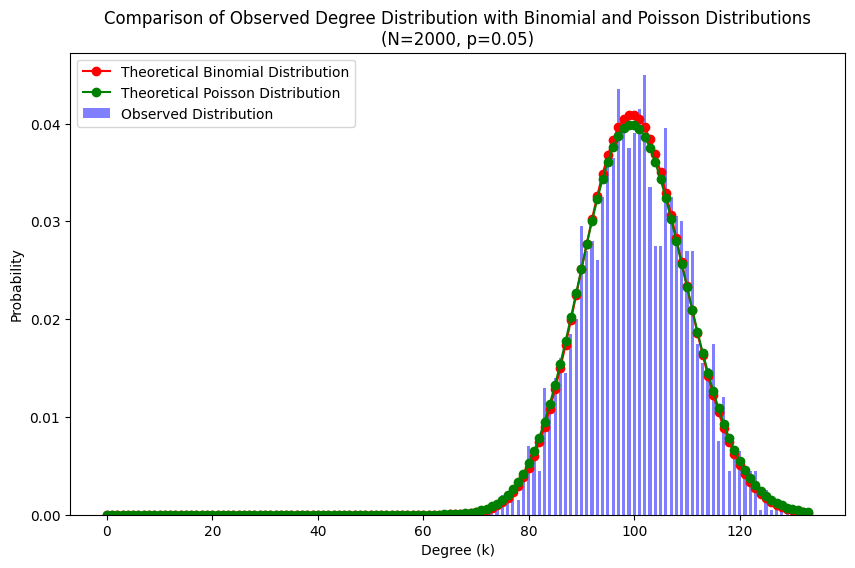

Plotting for N=2000 and p=0.1


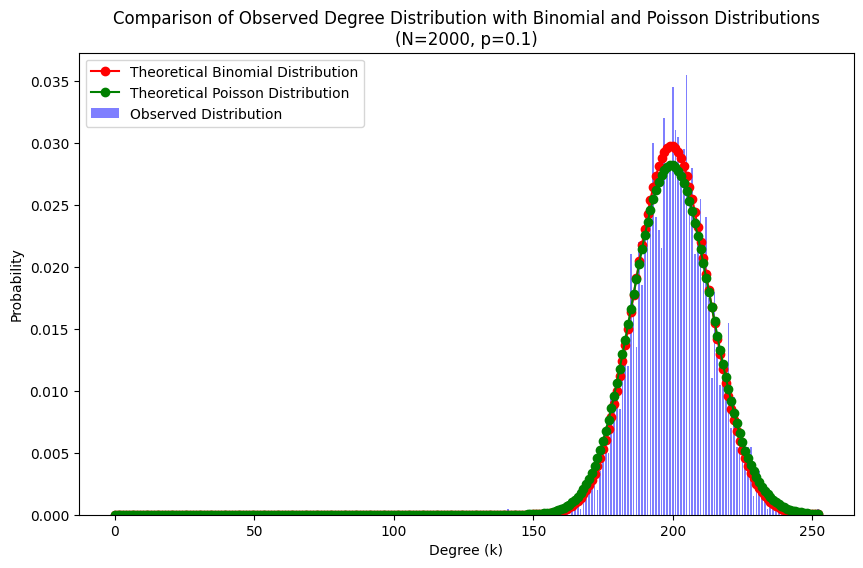

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
import networkx as nx

def erdos_renyi_graph(N, p):
    adjacency_matrix = np.zeros((N, N), dtype=int)
    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1
    return adjacency_matrix

def plot_er_degree_distribution(N, p):
    lambda_ = p * (N - 1)  # Expected degree for Poisson approximation
    
    # Generate the ER graph and calculate degrees
    adj_matrix = erdos_renyi_graph(N, p)
    G = nx.from_numpy_array(adj_matrix)
    degrees = [degree for node, degree in G.degree()]
    
    # Observed Degree Distribution (Histogram)
    observed_counts, bins = np.histogram(degrees, bins=range(max(degrees) + 2), density=True)
    
    # Theoretical Binomial Distribution
    k_values = np.arange(0, max(degrees) + 1)
    binomial_probs = binom.pmf(k_values, N - 1, p)
    
    # Theoretical Poisson Distribution
    poisson_probs = poisson.pmf(k_values, lambda_)
    
    # Plot Observed and Theoretical Degree Distributions
    plt.figure(figsize=(10, 6))
    plt.bar(bins[:-1], observed_counts, width=0.6, alpha=0.5, color='blue', label="Observed Distribution")
    plt.plot(k_values, binomial_probs, 'ro-', label="Theoretical Binomial Distribution")
    plt.plot(k_values, poisson_probs, 'go-', label="Theoretical Poisson Distribution")
    plt.xlabel("Degree (k)")
    plt.ylabel("Probability")
    plt.title(f"Comparison of Observed Degree Distribution with Binomial and Poisson Distributions\n(N={N}, p={round(p,2)})")
    plt.legend()
    plt.show()

# Testing for various N and p values
N_values = [500, 1000, 2000]
p_values = [0.01, 0.05, 0.1]

for N in N_values:
    for p in p_values:
        print(f"Plotting for N={N} and p={p}")
        plot_er_degree_distribution(N, p)


# P 5.1 

Open LaTeX

# 5.2

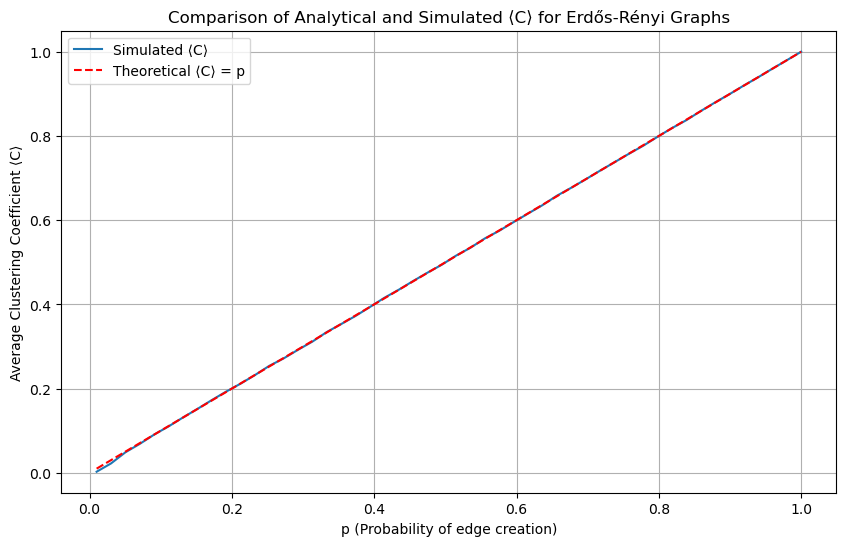

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

num_nodes = 100  # Number of nodes in the graph
p_values = np.linspace(0.01, 1, 50)  # Different probabilities for edge creation
num_simulations = 100  # Number of simulations for each p

average_clustering = []

# Run simulations
for p in p_values:
    clustering_coeffs = []
    for _ in range(num_simulations):
        G = nx.erdos_renyi_graph(num_nodes, p)
        clustering_coeff = nx.average_clustering(G)
        clustering_coeffs.append(clustering_coeff)
    average_clustering.append(np.mean(clustering_coeffs))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(p_values, average_clustering, label='Simulated ⟨C⟩')
plt.plot(p_values, p_values, '--', label='Theoretical ⟨C⟩ = p', color='red')
plt.xlabel('p (Probability of edge creation)')
plt.ylabel('Average Clustering Coefficient ⟨C⟩')
plt.title('Comparison of Analytical and Simulated ⟨C⟩ for Erdős-Rényi Graphs')
plt.legend()
plt.grid(True)
plt.show()


# 5.3

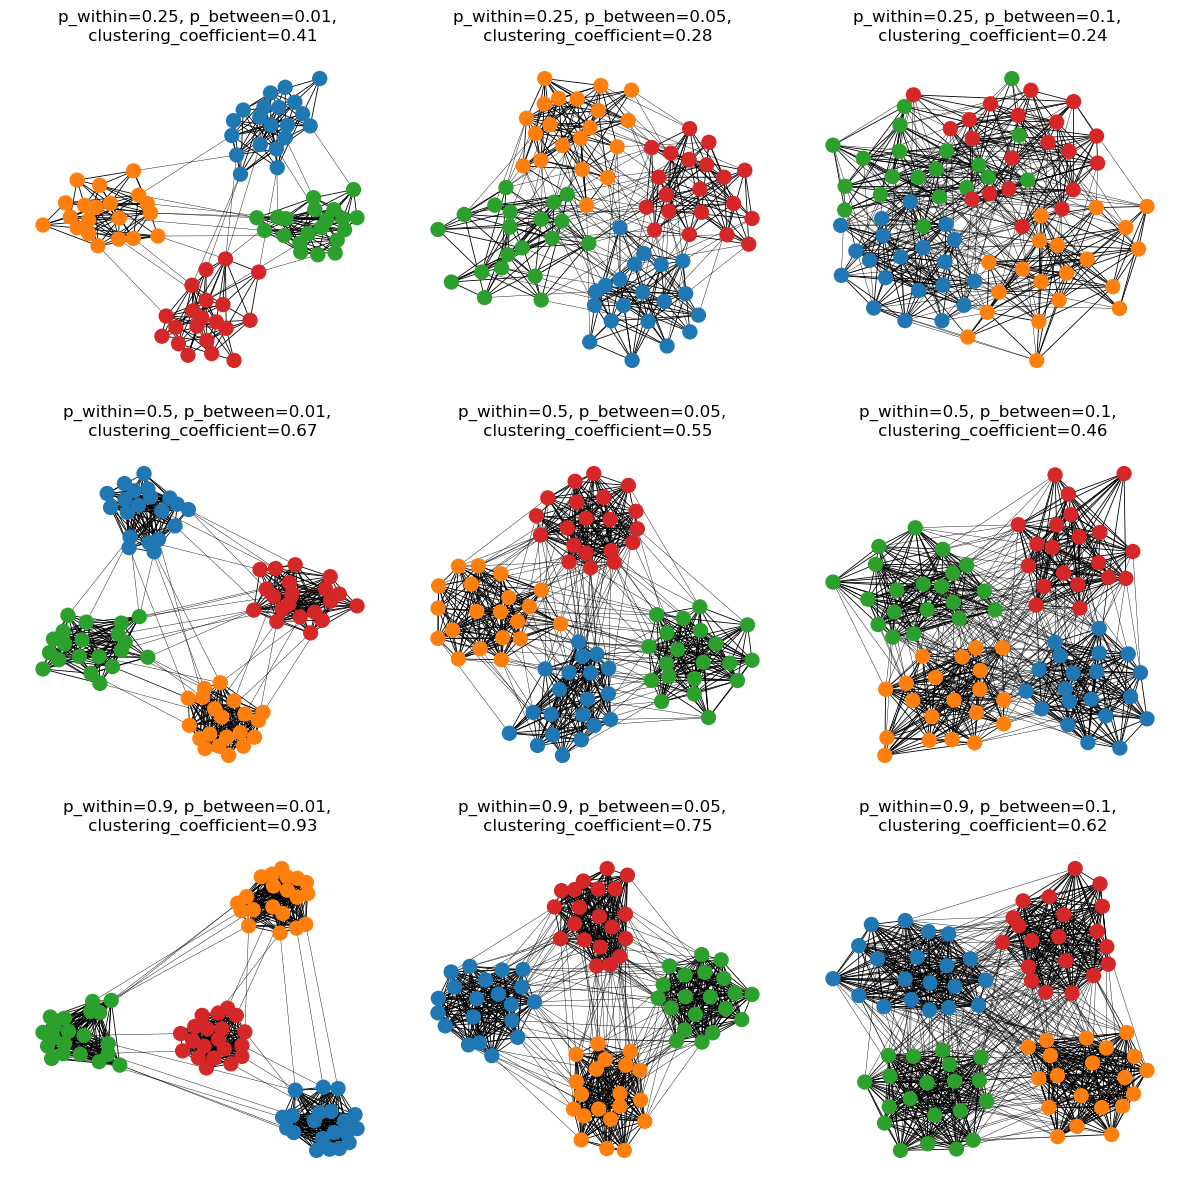

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt
import random
import numpy as np

def draw_community_graph(N=20, num_communities=4, p_within=0.3, p_between=0.05):
    G = nx.Graph()

    # intra-community edges
    node_community_mapping = {}
    for i in range(num_communities):
        nodes = range(i * N, (i + 1) * N)
        G.add_nodes_from(nodes)
        node_community_mapping.update({node: i for node in nodes})
        for u in nodes:
            for v in nodes:
                if u != v and random.random() < p_within:
                    G.add_edge(u, v)
                    G[u][v]['width'] = 0.6

    # inter-community edges
    for i in range(num_communities):
        for j in range(i + 1, num_communities):
            for u in range(i * N, (i + 1) * N):
                for v in range(j * N, (j + 1) * N):
                    if random.random() < p_between:
                        G.add_edge(u, v)
                        G[u][v]['width'] = 0.3

    # Create a color palette with more contrasting colors
    community_colors = [
        plt.cm.tab10(i) for i in range(min(10, num_communities))
    ] + [
        plt.cm.Set3(i) for i in range(min(12, num_communities - 10))
    ] + [
        plt.cm.Accent(i) for i in range(num_communities - 22)
    ]

    node_colors = [community_colors[node_community_mapping[node] % len(community_colors)] for node in G.nodes()]

    # Draw the graph with community colors
    pos = nx.spring_layout(G)
    width = [G[u][v]['width'] for u, v in G.edges()]
    clustering_coefficient = nx.average_clustering(G)

    return G, pos, node_colors, width, clustering_coefficient

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
parameters = [(0.25, 0.01), (0.25, 0.05), (0.25, 0.1), (0.5, 0.01), (0.5, 0.05), (0.5, 0.1), (0.9, 0.01), (0.9, 0.05), (0.9, 0.1)]

for i, ax in enumerate(axes.ravel()):
    p_within, p_between = parameters[i]
    G, pos, node_colors, width, clustering_coefficient = draw_community_graph(p_within=p_within, p_between=p_between)
    nx.draw(G, pos, with_labels=False, node_size=100, node_color=node_colors, width=width, ax=ax)
    ax.set_title(f'p_within={p_within}, p_between={p_between}, \n clustering_coefficient={clustering_coefficient:.2f}')

plt.tight_layout()
plt.show()


# 5.4

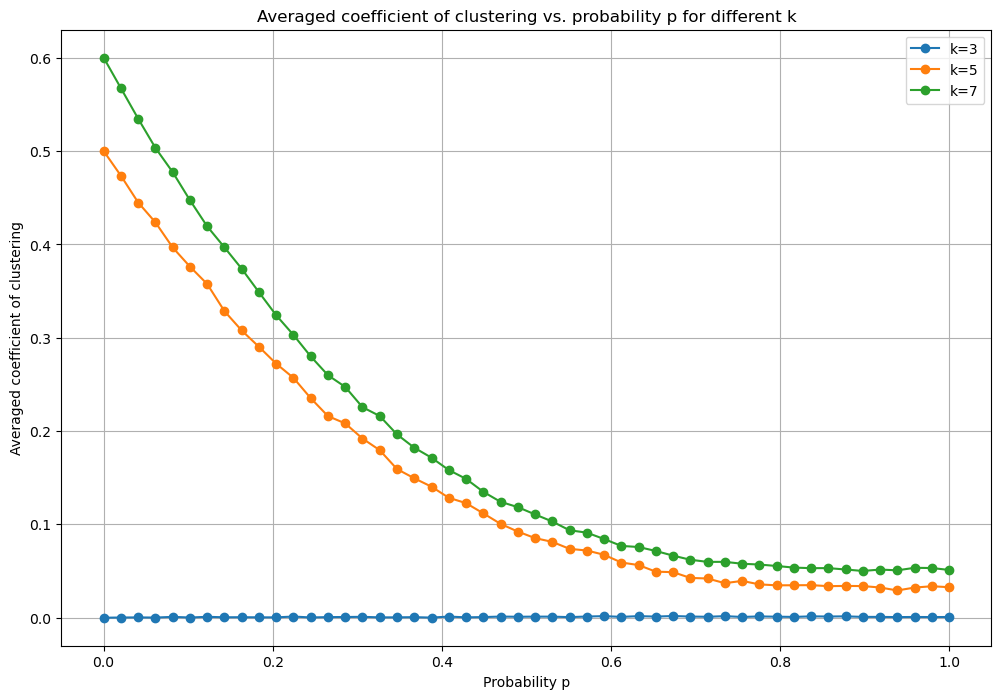

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of nodes in the network

# Function to calculate the average clustering coefficient for a given probability p
def avClustCoefWS(p: float, M=100, k=5) -> float:
    summ = 0
    for _ in range(M):
        G = nx.generators.random_graphs.connected_watts_strogatz_graph(N, k, p)
        summ += nx.average_clustering(G)
    return summ / M

# Range of probability values
X = np.linspace(0, 1, 50)

# Values of k to plot
k_values = [3, 5, 7]

# Plot the graph for different values of k
plt.figure(figsize=(12, 8))
for k in k_values:
    Y = [avClustCoefWS(p, k=k) for p in X]
    plt.plot(X, Y, marker='o', label=f'k={k}')

# Adding plot details
plt.title("Averaged coefficient of clustering vs. probability p for different k")
plt.xlabel("Probability p")
plt.ylabel("Averaged coefficient of clustering")
plt.legend()
plt.grid(True)
plt.show()


# 5.5

Converged: True


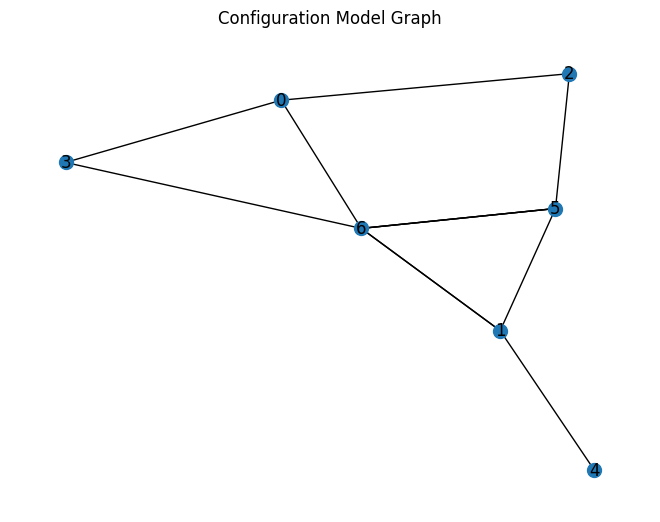

In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

def configuration_model(degree_sequence, max_iter=1000):
    num_iter = 0

    # Initialize the graph
    G = nx.MultiGraph()
    degrees = np.array(degree_sequence)
    
    for i in range(len(degree_sequence)):
        G.add_node(i)

    # Keep track of stub pairs for edge formation
    while any(degrees > 0) and num_iter < max_iter:
        # Select two distinct nodes with available degree stubs
        i = np.random.choice(np.where(degrees > 0)[0])
        degrees[i] -= 1
        
        j = np.random.choice(np.where(degrees > 0)[0])
        # Avoid self-loops
        while j == i and len(np.where(degrees > 0)[0]) > 1:
            j = np.random.choice(np.where(degrees > 0)[0])
        
        degrees[j] -= 1
        G.add_edge(i, j)
        num_iter += 1

    return G

# Example degree sequence
degree_sequence = [3, 4, 2, 2, 1, 5, 7]
G = configuration_model(degree_sequence)

# Check if the degree sequence is preserved
converged = np.all([G.degree(node) == degree for node, degree in enumerate(degree_sequence)])

print("Converged:", converged)

# Visualize the generated graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100)
plt.title("Configuration Model Graph")
plt.show()


Converged: True


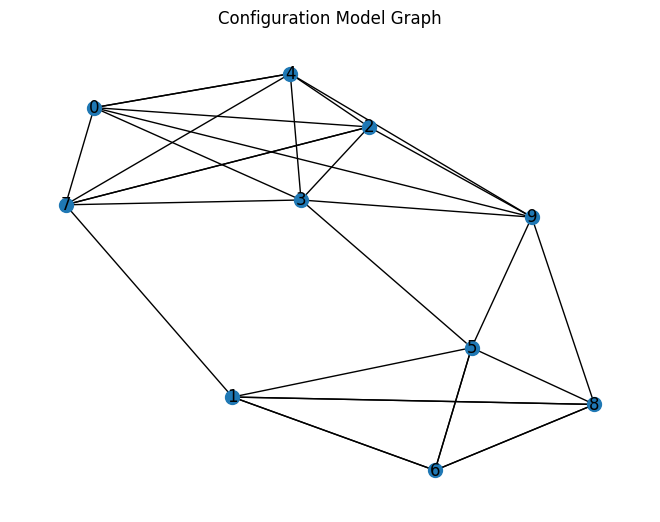

In [2]:
# Example degree sequence
degree_sequence = [6,6,6,6,6,6,6,6,6,6]
G = configuration_model(degree_sequence)

# Check if the degree sequence is preserved
converged = np.all([G.degree(node) == degree for node, degree in enumerate(degree_sequence)])

print("Converged:", converged)

# Visualize the generated graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100)
plt.title("Configuration Model Graph")
plt.show()


In [22]:
import networkx as nx
import numpy as np

def ensure_even_degree_sequence(degree_sequence):
    # Check if sum is even; if not, add 1 to the last element
    if sum(degree_sequence) % 2 != 0:
        degree_sequence[-1] += 1
    return degree_sequence

def test_configuration_model_convergence(degree_sequence, num_trials=100):
    # Ensure the degree sequence has an even sum
    degree_sequence = ensure_even_degree_sequence(degree_sequence)
    
    success_count = 0
    
    for _ in range(num_trials):
        # Generate the graph using NetworkX's configuration_model
        G = nx.configuration_model(degree_sequence)
        
        # Convert G to a simple graph without parallel edges and self-loops for comparison
        G_simple = nx.Graph(G)
        G_simple.remove_edges_from(nx.selfloop_edges(G_simple))
        
        # Check if the degree sequence of the simple graph matches the desired degree sequence
        generated_degrees = sorted([d for _, d in G_simple.degree()])
        target_degrees = sorted(degree_sequence)
        
        if generated_degrees == target_degrees:
            success_count += 1
    
    success_rate = (success_count / num_trials) * 100
    print(f"Success rate: {success_rate:.2f}% for degree sequence {degree_sequence}")
    return success_rate

# Modified degree sequences for testing
degree_sequences = [
    [4, 3, 3, 3, 6, 5, 3, 3, 4, 3, 2, 2, 4, 3, 4, 7, 9],  # Higher complexity and variation
    [5, 5, 5, 5, 5, 5, 5,5,5,5],  # Uniform degree, moderate level
    [12, 12, 12, 12, 12, 12, 12, 14],  # High degree nodes
    [2, 2, 2, 1, 3, 3],  # Sparse and varied low degrees
    np.random.randint(2, 8, size=15).tolist()  # Random degree sequence with max degree 7
]

# Run tests on each degree sequence
for seq in degree_sequences:
    test_configuration_model_convergence(seq, num_trials=1000)


Success rate: 0.10% for degree sequence [4, 3, 3, 3, 6, 5, 3, 3, 4, 3, 2, 2, 4, 3, 4, 7, 9]
Success rate: 0.00% for degree sequence [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Success rate: 0.00% for degree sequence [12, 12, 12, 12, 12, 12, 12, 14]
Success rate: 10.00% for degree sequence [2, 2, 2, 1, 3, 4]
Success rate: 0.00% for degree sequence [7, 4, 7, 4, 2, 2, 6, 3, 4, 6, 6, 6, 7, 4, 4]
